#  Plus de lois avec scipy

In [1]:
import numpy as np
np.set_printoptions(precision=2,suppress=True)
import matplotlib.pyplot as plt

"""Voici un autre import qu'il faut connaître :
scipy= sci-entific py-thon """
import scipy.stats as stats
%matplotlib inline  

4 mots clefs à retenir (qui permettent aussi d'améliorer son anglais scientifique) :

* pdf -> Probability density function.  -> densité (prend des réels en argument)
* pmf -> Probability mass function -> densité discrète (prend des entiers en argument)

* cdf -> Cumulative density function.   -> fonction de répartition
* ppf -> Percent point function (inverse of cdf ) ->  fonction quantile (ou percentile)

* rvs -> Random variates. -> simulation d'un échantillon de va ayant la loi donnée


A ce point du TP, vous vous dites qu'il y a vraiment trop de choses à retenir. Mais nous
allons les pratiquez très souvent : cela rentrera tout seul.

## Densité, fonction de réparition, quantiles

### une loi continue

/Users/vigon/Library/Python/3.6/lib/python/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


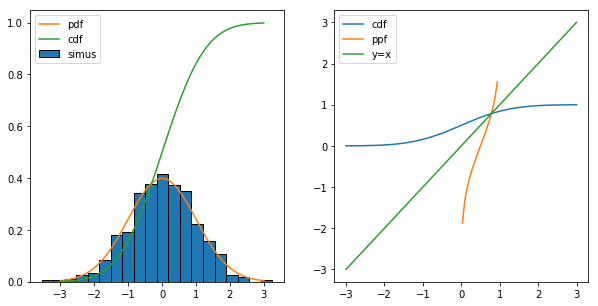

In [2]:
simus=stats.norm.rvs(loc=0, scale=1, size=1000)
"""
c'est tout à fait identique à :
simus=np.random.normal(loc=0,scale=1,size=1000)

cependant scipy.stats contient encore plus de loi que numpy.random.
Par exemple la loi t de student utile pour les stats.
"""
plt.figure(figsize=(10,5))


x=np.linspace(-3,3,100)
pdf=stats.norm.pdf(x, loc=0, scale=1)
cdf=stats.norm.cdf(x, loc=0, scale=1)
ppf=stats.norm.ppf(x, loc=0, scale=1)

plt.subplot(1,2,1)
plt.hist(simus,20,normed=True,label="simus",edgecolor="k")
plt.plot(x,pdf,label="pdf")
plt.plot(x,cdf,label="cdf")
plt.legend()

plt.subplot(1,2,2)
plt.plot(x, cdf,label="cdf")
plt.plot(x, ppf,label="ppf")
plt.plot(x, x,label="y=x")
plt.legend();

Le tracé de la ppf ci-dessus n'est pas très joli, on a l'impression qu'il est incomplet.
Changez cela. 

Aide: n'oubliez pas qu'une courbe, c'est des points qu'on relie entre eux, et que ces points, c'est vous qui les spécifiez. 

### une loi discrète

/Users/vigon/Library/Python/3.6/lib/python/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


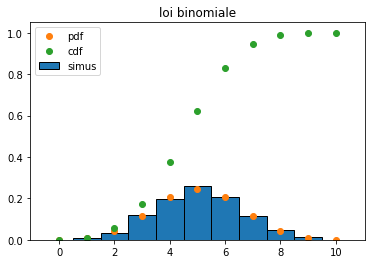

In [3]:
n=10
p=0.5
simus=stats.binom.rvs(n, p, size=1000)


x=np.arange(0,n+1)
bins=np.arange(0,n+2)-0.5
""" attention, la densité discréte en scipy c'est pmf et pas pdf """
pdf=stats.binom.pmf(x, n, p)
cdf=stats.binom.cdf(x, n, p)


plt.hist(simus, bins, normed=True, label="simus",edgecolor="k")
plt.plot(x, pdf,'o' , label="pdf")
plt.plot(x, cdf,'o', label="cdf")
plt.title("loi binomiale")
plt.legend();


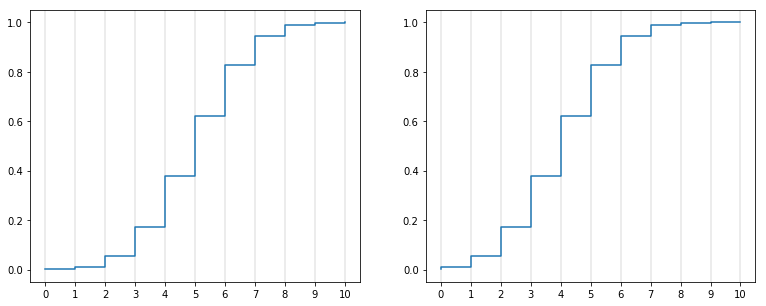

In [4]:
""" variante. On trace la fonction de répartition en escalier. 
On rajoute des lignes verticales pour vous aidez dans l'exo suivant"""
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
""" lignes verticales.  """
for xc in x:plt.axvline(x=xc, color='0.9') #0.9 => un gris très clair (0=noir,1=blanc)
plt.plot(x, cdf,drawstyle='steps-post')
plt.xticks(x)


plt.subplot(1,2,2)
for xc in x:plt.axvline(x=xc, color='0.9')
plt.plot(x, cdf,drawstyle='steps-pre')
plt.xticks(x);





***Exo:*** laquelle de ces deux représentations correpond à la fonction de répartition, à savoir: 
	$x \to P[ X\leq x]$


***Conseil:*** lisez bien les messages d'erreur. Par exemple si vous écrivez :
    `plt.plot(x,y,drawstyle='steps-after',color="red")`
cela provoque un message d'erreur :

    ValueError: Unrecognized drawstyle steps-pre default steps-post steps-mid steps

Ce message nous indique que l'on c'est tromper de mot clef, et nous propose les mot clefs valides. 
D'après vous, quand on écrit `drawstyle=default`, comment les points sont reliés ?

## Conseil python: les arguments facultatifs

Considérons un appel d'une fonction de scipy :

In [5]:
stats.norm.rvs(loc=-1,scale=3,size=100);


Tous les arguments sont facultatifs. Les valeurs par défaut sont logiquement `loc=0,scale=1,size=1`
On peut écrire par exemple 

    simus=stat.norm.rvs(size=1000)

pour

     simus=stat.norm.rvs(loc=0,scale=1,size=1000)


Mais attention : si on ne précise pas le nom des arguments, ils sont pris dans l'ordre `1:loc 2:scale 3:size`
Par exemple, si je veux tirer 1000 gaussienne et que j'écris

     simus=stat.norm.rvs(1000)

mon programme bug car cela correspond à 

    simus=stat.norm.rvs(loc=1000)

Je vous conseille d'écrire quasi tout le temps le nom des arguments pour éviter ce genre de confusion ; sauf quand il s'agit d'un argument obligatoire évident comme dans `plt.plot(x,y)`.  

Ou bien, conseil plus simple: adopter dans un premier temps la façon dont sont codés ces TP. Quand vous serez des vieux routier du python, vous créerez votre propre style. 

##  lois continues classiques

### paramètres de localisation et d'échelle

Toutes les lois dans scipy ont un paramètre de localisation `loc` que nous notons ici $\mu$ et un paramètre d'échelle `scale` que nous notons ici $\sigma$. Leur interprétation est la suivante :

Si l'appel de `stats.xxx.rvs()` renvoie une v.a $X$
alors `stats.xxx.rvs(loc=mu,scale=sigma)` renvoie une v.a ayant la même loi que sigma $\sigma X + \mu$.  Ainsi ces deux paramètres effectue à des translation et dilatation de la densité comme l'indique la proposition suivante :




***Proposition :*** si $x\to f(x)$ est la densité d'une va $X$, alors la densité de $\sigma X + \mu$ est:
$$
   \frac 1 \sigma  \ f \ \Big(  \frac{ x-mu}  \sigma \Big)
$$


*Astuce:* Pour ne pas s'encombrer la mémoire, retenez uniquement les densités des lois dans le cas $\mu=0$ et $\sigma=1$. Par exemple:  

$$
\begin{array}{cc}
a & b \\
\end{array}
$$

| nom de la loi |&nbsp; &nbsp; &nbsp; &nbsp;  simplifié &nbsp; &nbsp; &nbsp; &nbsp;  |&nbsp; &nbsp; &nbsp; &nbsp;  complète &nbsp; &nbsp; &nbsp; &nbsp; |
|---------------|-----------| --------|
| exponentielle | $e^{-x} 1_{\{x>0\}}$ | $\frac {1} {\sigma} \exp(-  \frac {x-\mu } {\sigma} )$   |
| normale       | $\frac {1} { \sqrt {2 \pi}} e^{-\frac{1}{2} x^2}$ |  ...     |






*Démo de la proposition:*
Considérons $\phi$ fonction teste et $X$ une va de densité $f$
$$
      \mathbf  E[\phi( \sigma X + mu )] =   \int \phi( \sigma x + \mu) \ f(x) \ dx 
$$
On effectue le changement de variable   $\sigma x + \mu \to y$ 
$$
       \mathbf  E[\phi( \sigma X + mu )] =   \int \phi( y) \ f(... ) \ dy ...  
$$
On en déduit que   ... 



### Loi Normale

    norm.pdf(x) = exp(-x**2/2)/sqrt(2*pi)

/Users/vigon/Library/Python/3.6/lib/python/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


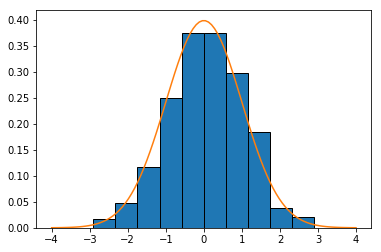

In [6]:
plt.hist(stats.norm.rvs(loc=0,scale=1,size=400),normed=True,edgecolor="k")

x=np.linspace(-4,4,100)
plt.plot(x,stats.norm.pdf(x,loc=0,scale=1));


EXO : Reprenez le dernier programme, améliorez-le car il souffre d'un défaut classique. 
Faites varier les paramètres loc et scale. Supperposer plusieurs graphique pour que l'on comprennent bien les effets de dilatation et de translation de ces paramètres.  




### Paramètres de forme

Pour toutes les loi suivantes, nous ne nous occuperons plus des paramètres loc et scale, pour nous concentrer sur les autres paramètres (quand ils existent). Ces autres paramètres sont appelé paramètres de forme. 

### Loi gamma

	gamma.pdf(x, a) = x**(a-1) * exp(-x) / gamma(a)

Pour quelle valeur de `a` retrouve-t-on une loi exponentielle ?


/Users/vigon/Library/Python/3.6/lib/python/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


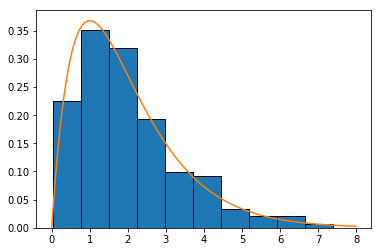

In [7]:
"""paramètre de forme"""
a=2
plt.hist(stats.gamma.rvs(a=a,size=400),normed=True,edgecolor="k")

x=np.linspace(0,8,100)
plt.plot(x,stats.gamma.pdf(x,a=a));


Exo: Le paramètre des forme est a. Quand il est entier il a l'interprétation suivante : gamma(a) est la loi de la somme de a v.a. exponentielle indépendantes. Illustrer ce fait par des simulations. 

Exo: pour quels paramètres a la densité est-elle monotone ?  

### Loi Beta


                            gamma(a+b) * x**(a-1) * (1-x)**(b-1)
        beta.pdf(x, a, b) = ------------------------------------
                                     gamma(a)*gamma(b)





/Users/vigon/Library/Python/3.6/lib/python/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


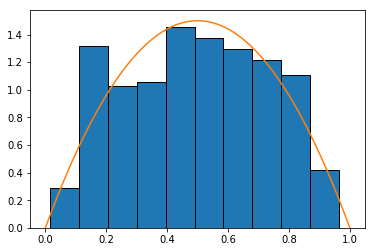

In [8]:
""" deux paramètres de formes"""
a=2
b=2
plt.hist(stats.beta.rvs(a=a,b=b,size=400),normed=True,edgecolor="k")
x=np.linspace(0,1,100)
plt.plot(x,stats.beta.pdf(x,a=a,b=b));

Exo : faites varier a et b de manière à faire apparaitres tous les 'type' possible de loi béta : cloche, smiley ,décroissant, croissant

## Lois à Queues lourdes

Une loi est dites à queue lourde lorsque les v.a qui ont cette loi peuvent prendre, de temps en temps, des grandes valeurs positives ou négatives. Elle servent à modéliser des évènements rare et violent (ex: crue d'un fleuve). 

In [9]:
""" une fonction effectuant un histogramme tronqué """
def hist_trunc(ech,gauche,droite,nb_batons):  
    bins=np.linspace(gauche,droite,nb_batons)
    interval_width=(droite-gauche)/nb_batons
    weigh=np.ones_like(ech)/len(ech)/interval_width
    plt.hist(ech,bins=bins,weights=weigh,edgecolor="k")
    

### Loi t de Student
```
                                       gamma((df+1)/2)
        t.pdf(x, df) = ---------------------------------------------------
                       sqrt(pi*df) * gamma(df/2) * (1+x**2/df)**((df+1)/2)
```

C'est une loi très utile en statistique. 

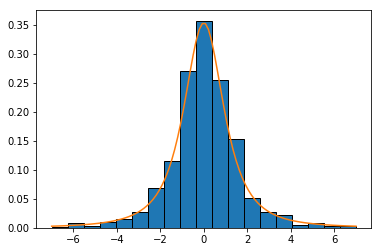

In [10]:
""" df = degree of freedom"""
df=2
X=stats.t.rvs(df=df,size=1000)
hist_trunc(X,-7,7,20)
x=np.linspace(-7,7,100)
plt.plot(x,stats.t.pdf(x,df=df));


Pour df petit (ex:2), c'est une loi à queue lourde. Pour df grand, elle ressemble à la loi normale.  

### Loi de cauchy

 


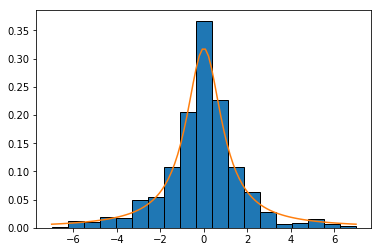

In [11]:
df=2 #degree au freedom
X=stats.cauchy.rvs(size=1000)
hist_trunc(X,-7,7,20)
x=np.linspace(-7,7,100)
plt.plot(x,stats.cauchy.pdf(x));

***Proposition:*** Soit X,Y deux gaussiennes indépendantes. Alors le rapport X/Y suit une loi de Cauchy.
(on comprend aussi ici que les va de Cauchy peuvent prendre des valeurs très grandes).


Mais en attendant, on peut facilement faire la preuve avec la technique habituelle :


Soit phi une fonction teste et X,Y deux gaussiennes indépendantes. On a

        E[X/Y] = cst  int int   phi(x/y)  e^{-0.5 x^2} e^{-0.5 y^2} dx dy

En posant x/y = z  et donc en faisant le changement de variable x -> yz  (ou bien y-> x/z) on obtient ...

Ensuite, on peut calculer explicitement l'une des deux intégrale, et on tombe sur la densité de la Cauchy.

***Exo 1:*** Complétez cette démonstration.

***Exo 2:*** Illustrer la proposition par des simulations. 

## Relations entre les lois


Il est important de retenir les relations entre les principales lois, l'image ci-dessous peut vous aider à cela. Sinon, sur cette [page](http://www.math.wm.edu/~leemis/chart/UDR/UDR.html) contient encore plus de relations, ainsi que leur justifications mathématique. 

![Relationships_among_some_of_univariate_probability_distributions](img/distributions.jpg)